In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as plt
import datetime 
%matplotlib inline
import matplotlib
matplotlib.rcParams['axes.unicode_minus'] = False

import matplotlib.pyplot as plt
%matplotlib inline

import platform
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from matplotlib import font_manager, rc
from matplotlib import style

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~') 

In [48]:
nba_retire = pd.read_csv('nba_df.csv')

In [34]:
nba_retire.sort_values('age',ascending=False)

,name,age,season
174,Vince Carter,43,2019
167,Jason Terry,42,2019
149,Manu Ginóbili,41,2018
114,Ray Allen,41,2016
74,Steve Nash,41,2014
109,Kevin Garnett,40,2016
45,Juwan Howard,40,2013
139,Stephon Marbury,40,2017
38,Grant Hill,40,2013
39,Jason Kidd,40,2013


In [49]:
nba_all = pd.read_csv('all_seasons.csv')
nba_all.drop('Unnamed: 0',axis=1,inplace=True)
nba_all.head()

,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,draft_number,...,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season
0,Dennis Rodman,CHI,36.0,198.12,99.790240,Southeastern Oklahoma State,USA,1986,2,27,...,5.7,16.1,3.1,16.1,0.186,0.323,0.100,0.479,0.113,1996-97
1,Dwayne Schintzius,LAC,28.0,215.90,117.933920,Florida,USA,1990,1,24,...,2.3,1.5,0.3,12.3,0.078,0.151,0.175,0.430,0.048,1996-97
2,Earl Cureton,TOR,39.0,205.74,95.254320,Detroit Mercy,USA,1979,3,58,...,0.8,1.0,0.4,-2.1,0.105,0.102,0.103,0.376,0.148,1996-97
3,Ed O'Bannon,DAL,24.0,203.20,100.697424,UCLA,USA,1995,1,9,...,3.7,2.3,0.6,-8.7,0.060,0.149,0.167,0.399,0.077,1996-97
4,Ed Pinckney,MIA,34.0,205.74,108.862080,Villanova,USA,1985,1,10,...,2.4,2.4,0.2,-11.2,0.109,0.179,0.127,0.611,0.040,1996-97


In [51]:
nba_injury = pd.read_csv('nba_injury_1998.csv')
nba_injury.rename({'Relinquished':'name'},axis=1,inplace=True)

In [6]:
def info(df):
    display(df.describe())
    display(df.info())
    display(df.isna().sum())

In [12]:
info(nba_all)

,Unnamed: 0,age,player_height,player_weight,gp,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct
count,11145.000000,11145.000000,11145.000000,11145.000000,11145.000000,11145.000000,11145.000000,11145.000000,11145.000000,11145.000000,11145.000000,11145.000000,11145.000000,11145.000000
mean,5572.000000,27.168686,200.812818,100.637868,52.005832,8.126487,3.560036,1.801463,-2.153899,0.055593,0.141772,0.185599,0.508099,0.131078
std,3217.428709,4.344164,9.190973,12.576295,25.069495,5.935482,2.495394,1.789940,12.150611,0.043889,0.063194,0.053047,0.098879,0.095017
min,0.000000,18.000000,160.020000,60.327736,1.000000,0.000000,0.000000,0.000000,-200.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2786.000000,24.000000,195.580000,90.718400,32.000000,3.500000,1.800000,0.600000,-6.300000,0.022000,0.096000,0.150000,0.478000,0.065000
50%,5572.000000,27.000000,200.660000,99.790240,58.000000,6.600000,3.000000,1.200000,-1.300000,0.043000,0.132000,0.182000,0.521000,0.102000
75%,8358.000000,30.000000,208.280000,109.315672,74.000000,11.500000,4.700000,2.400000,3.200000,0.086000,0.182000,0.218000,0.557000,0.178000
max,11144.000000,44.000000,231.140000,163.293120,85.000000,36.100000,16.300000,11.700000,300.000000,1.000000,1.000000,1.000000,1.500000,1.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11145 entries, 0 to 11144
Data columns (total 22 columns):
Unnamed: 0           11145 non-null int64
player_name          11145 non-null object
team_abbreviation    11145 non-null object
age                  11145 non-null float64
player_height        11145 non-null float64
player_weight        11145 non-null float64
college              11145 non-null object
country              11145 non-null object
draft_year           11145 non-null object
draft_round          11145 non-null object
draft_number         11145 non-null object
gp                   11145 non-null int64
pts                  11145 non-null float64
reb                  11145 non-null float64
ast                  11145 non-null float64
net_rating           11145 non-null float64
oreb_pct             11145 non-null float64
dreb_pct             11145 non-null float64
usg_pct              11145 non-null float64
ts_pct               11145 non-null float64
ast_pct              1

None

Unnamed: 0           0
player_name          0
team_abbreviation    0
age                  0
player_height        0
player_weight        0
college              0
country              0
draft_year           0
draft_round          0
draft_number         0
gp                   0
pts                  0
reb                  0
ast                  0
net_rating           0
oreb_pct             0
dreb_pct             0
usg_pct              0
ts_pct               0
ast_pct              0
season               0
dtype: int64

In [7]:
info(nba_injury)

,Date,Team,Relinquished,Notes,Notes2
count,13379,13379,13379,13379,13379
unique,3291,33,1873,2033,1975
top,2006-10-31,Spurs,(William) Tony Parker,placed on IL,placed on IL
freq,73,604,50,5138,5138


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13379 entries, 0 to 13378
Data columns (total 5 columns):
Date            13379 non-null object
Team            13379 non-null object
Relinquished    13379 non-null object
Notes           13379 non-null object
Notes2          13379 non-null object
dtypes: object(5)
memory usage: 522.7+ KB


None

Date            0
Team            0
Relinquished    0
Notes           0
Notes2          0
dtype: int64

In [103]:
name_list = nba_retire.groupby(['name']).count().sort_values('age',ascending=False)
name_list = list(name_list[name_list['age'] == 2].index)
name_list

['Keyon Dooling',
 'Rasheed Wallace',
 'Elton Brand',
 'Nazr Mohammed',
 'Brandon Roy',
 'Nick Collison',
 'Boštjan Nachbar']

In [105]:
index_list = []
while len(name_list) > 0:
    cnt = len(name_list)
    for idx, value in nba_retire.iterrows():
        if value[0] in name_list:
            index_list.append(idx)
            name_list.remove(value[0]) 
nba_retire = nba_retire.drop(index_list).reset_index(drop=True)
nba_retire

,name,age,season
0,Kevin Ollie,37,2010
1,Adonal Foyle,35,2010
2,Fabricio Oberto,35,2010
3,Steve Francis,33,2010
4,Robert Traylor,34,2010
5,Jason Williams,35,2011
6,Jarron Collins,32,2011
7,Shaquille O'Neal,39,2011
8,Trajan Langdon,35,2011
9,Yao Ming,30,2011


In [106]:
nba_player = nba_all.groupby('player_name',as_index=False).agg({'season':'count'}).sort_values('season',ascending=False).reset_index(drop=True)


In [127]:
nba_01 = pd.merge(nba_retire, nba_player, left_on='name', right_on='player_name',how='left').sort_values('season_y').reset_index(drop=True)
nba_01 = nba_01.drop(['season_x','player_name'],axis=1).rename({'season_y':'season'},axis=1)
name_list = ['Rasho Nesterovic','Zydrunas Ilgauskas','Peja Stojakovic','T.J. Ford','Eduardo Najera','Vladimir Stepania','Darko Milicic',
             'Hedo Turkoglu','Kosta Perovic','Raul Lopez','Andres Nocioni','Primoz Brezec','Bostjan Nachbar','Jiri Welsch',
            'PJ Hairston','Manu Ginobili','Mike Dunleavy','Mirza Teletovic','Gerald Henderson','Jose Calderon','Kevin Seraphin']
cnt = 0
for i in range(155,176):
    nba_01.loc[i,'name'] = name_list[cnt]
    cnt += 1

,name,age,season
0,Matt Walsh,32,1.0
1,Rob Kurz,28,1.0
2,Sasha Kaun,31,1.0
3,Travis Hansen,33,1.0
4,Nolan Smith,27,2.0
5,Julius Hodge,31,2.0
6,Yaroslav Korolev,29,2.0
7,Coby Karl,32,2.0
8,Robbie Hummel,28,2.0
9,Adam Morrison,29,3.0


In [134]:
nba_02 = pd.merge(nba_01, nba_player, left_on='name', right_on='player_name').drop(['season_x','player_name'],axis=1).rename({'season_y':'season'},axis=1)

In [158]:
nba_injury_sum = nba_injury.groupby('name', as_index=False).agg({'Notes':'count'}).sort_values('Notes',ascending=False).reset_index(drop=True)
nba_injury_sum

,name,Notes
0,(William) Tony Parker,50
1,Emanuel Ginobili / Manu Ginobili,44
2,Dwyane Wade,43
3,C.J. Miles,37
4,Andrew Bogut,36
5,Bruno Caboclo,35
6,Devin Harris,35
7,Kawhi Leonard,35
8,Sean Marks,35
9,Melvin Ely,35


In [167]:
import re
re.split('[/)]',nba_injury_sum.loc[0,'name'])

['(William', ' Tony Parker']

In [151]:
nba_injury_merge = pd.merge(nba_02,nba_injury_sum,on='name',how='right').sort_values('season',ascending=False).reset_index(drop=True)
nba_injury_merge

,name,age,season,Notes
0,Vince Carter,43.0,22.0,12
1,Dirk Nowitzki,40.0,21.0,18
2,Kobe Bryant,37.0,20.0,17
3,Kevin Garnett,40.0,20.0,23
4,Jason Terry,42.0,19.0,8
5,Paul Pierce,39.0,19.0,13
6,Tim Duncan,40.0,19.0,27
7,Derek Fisher,39.0,18.0,6
8,Steve Nash,41.0,18.0,5
9,Ray Allen,41.0,18.0,14


In [12]:
nba_1020_injury.drop('Relinquished',axis=1,inplace=True)

In [13]:
nba_retire_merge = pd.merge(nba_1020_injury, nba_retire,left_on='player_name',right_on='name')

In [14]:
nba_retire_merge.drop('name',axis=1,inplace=True)

In [15]:
nba_retire_merge.columns=['name','year','count','retire_age','retire_season']

In [16]:
nba_retire_merge.head()

,name,year,count,retire_age,retire_season
0,Vince Carter,22,12,43,2019
1,Dirk Nowitzki,21,18,40,2019
2,Kevin Garnett,20,23,40,2016
3,Kobe Bryant,20,17,37,2015
4,Paul Pierce,19,13,39,2017


In [95]:
def corr(data,text):
    corr = data.corr(method='pearson')
    display(corr)
    style.use('ggplot')
    plt.title(text)
    sns.heatmap(data = corr, annot=True, fmt = '.2f', linewidths=.5, cmap='Blues')

,year,count,retire_age,retire_season
year,1.000000,0.281739,0.777588,0.041275
count,0.281739,1.000000,0.098233,0.405591
retire_age,0.777588,0.098233,1.000000,0.045603
retire_season,0.041275,0.405591,0.045603,1.000000


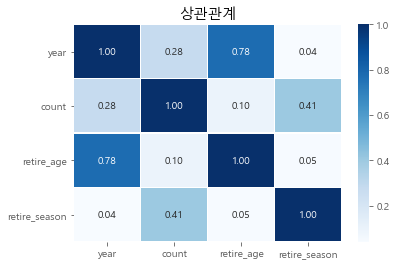

In [96]:
corr(nba_retire_merge,'상관관계')

In [103]:
nba_retire_merge.sort_values('count',ascending=False).head(10).reset_index(drop=True)

,name,year,count,retire_age,retire_season
0,Dwyane Wade,16,78,37,2019
1,Andrew Bogut,14,70,36,2020
2,Luol Deng,15,56,34,2019
3,Kevin Garnett,20,52,40,2016
4,Marvin Williams,15,50,34,2020
5,Trevor Booker,8,49,32,2019
6,Mo Williams,13,47,35,2018
7,Steve Nash,18,47,41,2014
8,David Lee,12,45,34,2017
9,Kevin Martin,12,45,33,2016


In [101]:
nba_retire_merge.describe()

,year,count,retire_age,retire_season
count,130.000000,130.000000,130.000000,130.000000
mean,12.261538,19.653846,34.953846,2015.476923
std,4.241825,15.481778,3.312793,2.558510
min,1.000000,1.000000,26.000000,2010.000000
25%,10.000000,7.000000,33.000000,2013.250000
50%,13.000000,15.500000,35.000000,2016.000000
75%,15.000000,29.000000,37.000000,2017.000000
max,22.000000,78.000000,43.000000,2020.000000


In [10]:
from urllib.request import urlopen
from bs4 import BeautifulSoup
from urllib.request import urlopen
from urllib.error   import HTTPError
from urllib.error   import URLError

import pandas as pd

In [191]:
from selenium import webdriver
import time
path = '../driver/chromedriver.exe'
driver = webdriver.Chrome(path)

In [195]:
def craw(start,end):
    page_list = [ i for i in range(start,end,25)]
    Date = []
    Team = []
    Acquired = []
    Relinquished = []
    Notes = []
    for page in page_list:
        driver.get('http://www.prosportstransactions.com/basketball/Search/SearchResults.php?Player=&Team=&BeginDate=1998-01-01&EndDate=2020-12-31&ILChkBx=yes&Submit=Search&start='+str(page))
        page = driver.find_elements_by_css_selector('.datatable')
        if len(page) != 0:
            for i in page[0].find_elements_by_tag_name('tbody'):
                k = i.find_elements_by_tag_name('tr')
                for data in k:
                    ll = data.find_elements_by_tag_name('td')
                    Date.append(ll[0].text)
                    Team.append(ll[1].text)
                    Acquired.append(ll[2].text)
                    Relinquished.append(ll[3].text)
                    Notes.append(ll[4].text)
    return   Date,Team, Acquired,Relinquished, Notes
        

In [40]:
Date,Team, Acquired,Relinquished, Notes = craw(0,5001)
Date1,Team1, Acquired1,Relinquished1, Notes1 = craw(5001,10001)
Date2,Team2, Acquired2,Relinquished2, Notes2 = craw(10001,15001)
Date3,Team3, Acquired3,Relinquished3, Notes3 = craw(15000,20001)
Date4,Team4, Acquired4,Relinquished4, Notes4 = craw(20001,25001)
Date5,Team5, Acquired5,Relinquished5, Notes5 = craw(25001,28526)

IndexError: list index out of range

In [42]:
df1 = pd.DataFrame({
    'Date':Date,
    'Team' : Team,
    'Acquired' : Acquired,
    'Relinquished' : Relinquished,
    'Notes' : Notes    
                   })

In [43]:
df2 = pd.DataFrame({
    'Date':Date1,
    'Team' : Team1,
    'Acquired' : Acquired1,
    'Relinquished' : Relinquished1,
    'Notes' : Notes1    
                   })

In [44]:
df3 = pd.DataFrame({
    'Date':Date2,
    'Team' : Team2,
    'Acquired' : Acquired2,
    'Relinquished' : Relinquished2,
    'Notes' : Notes2    
                   })

In [197]:
df4 = pd.DataFrame({
    'Date':Date3,
    'Team' : Team3,
    'Acquired' : Acquired3,
    'Relinquished' : Relinquished3,
    'Notes' : Notes3   
                   })

In [198]:
df5 = pd.DataFrame({
    'Date':Date4,
    'Team' : Team4,
    'Acquired' : Acquired4,
    'Relinquished' : Relinquished4,
    'Notes' : Notes4  
                   })

In [221]:
df6 = pd.DataFrame({
    'Date':Date5,
    'Team' : Team5,
    'Acquired' : Acquired5,
    'Relinquished' : Relinquished5,
    'Notes' : Notes5 
                   })

In [45]:
df1.to_csv('df1.csv',mode='w',index=False)
df2.to_csv('df2.csv',mode='w',index=False)
df3.to_csv('df3.csv',mode='w',index=False)

In [199]:
df4.to_csv('df4.csv',mode='w',index=False)
df5.to_csv('df5.csv',mode='w',index=False)

In [222]:
df6.to_csv('df6.csv',mode='w',index=False)

In [238]:
nba_injury_1998 = pd.concat([df1,df2,df3,df4,df5,df6])
drop_index = list(nba_injury_1998[nba_injury_1998['Date']==' Date'].index)
nba_injury_1998 = nba_injury_1998.drop(drop_index).reset_index(drop=True)
none_Relinquished = list(nba_injury_1998[nba_injury_1998['Relinquished'] ==''].index)
nba_injury_1998 = nba_injury_1998.drop(none_Relinquished).reset_index(drop=True)
nba_injury_1998 = nba_injury_1998.drop(['Acquired'],axis=1)  
nba_injury_1998.to_csv('nba_injury_1998.csv',mode='w',index=False)

In [240]:
for i in range(nba_injury_1998.shape[0]):
    if nba_injury_1998.loc[i,'Relinquished'] != '':
        nba_injury_1998.loc[i,'Relinquished'] = nba_injury_1998.loc[i,'Relinquished'].split('•')[1].strip()
        nba_injury_1998.loc[i,'Date'] = nba_injury_1998.loc[i,'Date'].strip()
        nba_injury_1998.loc[i,'Team'] = nba_injury_1998.loc[i,'Team'].strip()
        nba_injury_1998.loc[i,'Notes'] = nba_injury_1998.loc[i,'Notes'].strip()
    if nba_injury_1998.loc[i,'Relinquished'] =='':
        nba_injury_1998.loc[i,'Relinquished'] = nba_injury_1998.loc[i,'Relinquished']
        nba_injury_1998.loc[i,'Date'] = nba_injury_1998.loc[i,'Date'].strip()
        nba_injury_1998.loc[i,'Team'] = nba_injury_1998.loc[i,'Team'].strip()
        nba_injury_1998.loc[i,'Notes'] = nba_injury_1998.loc[i,'Notes'].strip()

In [266]:
for i in range(nba_injury_1998.shape[0]):
    data = nba_injury_1998.loc[i,'Notes'].split('with')
    print(data)
    if data[0] in  ['placed on IL ','placed on IR ']:
        nba_injury_1998.loc[i,'Notes2'] = data[1].strip()
    else:
        nba_injury_1998.loc[i,'Notes2'] = nba_injury_1998.loc[i,'Notes']

['placed on IL ', ' flu']
['placed on IR ', ' left wrist tendinitis']
['placed on IL ', ' flu / sore knees (P)']
['placed on IL ', ' herniated disc in neck']
['placed on IL ', ' sprained left ankle']
['placed on IL ', ' patella tendinitis']
['placed on IL ', ' flu']
['placed on IR ', ' left leg stress reaction']
['placed in IR ', ' small tear in right hamstring']
['placed on IR ', ' right ankle synovitis']
['placed on IL ', ' sprained right foot']
['placed on IL ', ' elbow synovitis']
['placed on IL ', ' sprained right ankle']
['placed on IL ', ' sore right shoulder']
['placed on IL ', ' hyperextended left knee']
['placed on IR ', ' plantar fasciitis in right foot']
['placed on IL ', ' strained right shoulder']
['placed on IL ', ' left knee tendinitis']
['placed on IR ', ' pulled left groin']
['placed on IR ', ' fractured left clavicle (out 6-8 weeks)']
['hamstring injury (DNP)']
['sore lower back (DTD)']
['placed on IL ', ' sprained right big toe']
['placed on IL ', ' strained right g

['placed on IL ', ' a sprained right knee']
['placed on IL ', ' sore left foot / plantar fasciatis in right foot']
['placed on IL ', ' right knee tendinitis']
['placed on IL ', ' torn ACL in left knee (out for season)']
['placed on IL ', ' strained right hamstring']
['placed on IL ', ' fractured right wrist']
['placed on IL ', ' strained left quadricep']
['placed on IL ', ' sprained left ankle']
['placed on IL ', ' sprained left ankle']
['placed on IL ', ' back spasms / strained lower back']
['placed on IL ', ' sore right knee']
['placed on IR ', ' strained tendon in right leg']
['placed on IL ', ' lower back spasms']
['placed on IL ', ' sprained right knee']
['placed on IR ', ' cervical spasms']
['placed on IL ', ' right knee tendinitis / bruised left quadriceps']
['placed on IL ', ' insomnia']
['placed on IL ', ' right knee patellar tendinitis']
['placed on IL ', ' strained left calf']
['placed on IL ', ' strained right calf']
['placed on IL ', ' left knee patella tendinitis']
['plac

['placed on IL ', ' right foot injury / strained back (Stats)']
['placed on IR ', ' right thumb injury']
['placed on IL ', ' sprained left ankle']
['placed on IL ', ' left knee patella tendinitis']
['placed on IL ', ' strained lower back']
['placed on IL ', ' strained lower back']
['placed on IR ', ' sprained shoulder (per Stats)']
['placed on IR ', ' pulled right hamstring']
['placed on IL ', ' strained left hip flexor']
['placed on IR ', ' severe left ankle sprain (out 2 weeks)']
['placed on IR ', ' a groin injury']
['placed on IR ', ' medial gastroc tear in left calf']
['placed on IR left knee surgery to repair tear in lateral and medial memiscus (out 8 weeks)']
['placed on IL ', ' left knee tendinitis']
['placed on IL ', ' sprained left ankle']
['placed on IR ', ' left knee synovititis']
['placed on IL ', ' strained left calf']
['placed on IL ', ' strained left groin']
['placed on IL ', ' left Achilles tendinitis']
['placed on IL ', ' sprained right ankle']
['placed on IR ', ' disl

['placed on IL ', ' strained lower back']
['placed on IL ', ' strained right elbow']
['placed on IR ', ' recovery from back surgery']
['placed on IR ', ' strained rib cage muscles']
['placed on IL recovering from surgery on knee']
['placed on IL ', ' bilateral medial tibial periositis (shin splints)']
['placed on IL ', ' sore left knee']
['placed on IL ', ' sprained right ankle']
['placed on IR ', ' left shoulder impingement']
['placed on IR ', ' plantar fasciaitis in left foot']
['placed on IL ', ' left patella tendinitis']
['placed on IL ', ' left knee injury']
['placed on IR ', ' thumb & knee injuries']
['placed on IL ', ' torn ACL in left knee']
['placed on IL ', ' right knee injury']
['placed on IL ', ' hyperextended left knee']
['placed on IL ', ' herniated disc in back']
['placed on IL ', ' strained right hamstring']
['placed on IL ', ' back spasms']
['placed on IL ', ' left patella tendinitis']
['placed on IL ', ' strained left hamstring']
['placed on IR ', ' facial injury / br

['placed on IL ', ' broken left thumb']
['placed on IL ', ' back spasms']
['placed on IL ', ' right knee tendinitis']
['placed on IL ', ' strained right shoulder']
['placed on IL ', ' sprained right wrist']
['placed on IR ', ' blood clot in left leg']
['placed on IL ', ' sore left knee']
['placed on IR ', ' fractured left hand']
['placed on IL ', ' strained left groin']
['placed on IL ', ' lower back spasms']
['placed on IR ', ' sprained finger']
['placed on IL ', ' strained lower back']
['placed on IL ', ' lower back spasms']
['placed on IR ', ' sprained left toe']
['placed on IR ', ' sore left Achilles tendon']
['placed on IL ', ' sprained left ankle']
['placed on IR ', ' dislocated right thumb']
['placed on IL ', ' sprained left ankle']
['placed on IR ', ' plantar fasciitis in left foot']
['placed on IR ', ' right foot plantar fascia strain (torn per Bulls media guide)']
['placed on IR ', ' left knee/quadriceps tendinitis']
['placed on IR ', ' strained right deltoid muscle (sprained

['placed on IL']
['placed on IL ', ' left knee tendinitis']
['placed on IL ', ' lower back pain']
['placed on IL ', ' sprained right ankle']
['placed on IL ', ' bone bruise in right foot']
['placed on IL ', ' right knee patella tendinitis']
['placed on IL ', ' broken right index finger (out 6-8 weeks)']
['placed on IL ', ' sprained left ankle']
['placed on IR ', ' right calf / Achilles tendinitis']
['placed on IL ', ' strained left hamstring']
['placed on IL ', ' left quadriceps tendinitis']
['placed on IL ', ' a torn ACL in left knee']
['placed on IL ', ' strained right groin']
['placed on IL ', ' left quadriceps tendinitis']
['placed on IR ', ' broken right middle finger']
['placed on IL ', ' bruised right knee']
['placed on IR ', ' high left ankle sprain']
['placed on IL ', ' sprained left ankle']
['placed on IL ', ' sprained left ankle']
['placed on IL ', ' left knee tendinitis']
['placed on IR ', ' a broken navicular bone in left wrist']
['placed on IL ', ' sprained right ankle']


['placed on IL ', ' back spasms']
['placed on IL ', ' sprained back']
['placed on IL ', ' torn ligaments in left knee']
['placed on IL ', ' groin injury']
['placed on IL recovering from surgery on left knee']
['placed on IL ', ' left Achilles tendinitis']
['placed on IL ', ' strained right quadriceps']
['placed on IL recovering from surgery on left knee']
['placed on IL ', ' sore right hamstring and lower back']
['placed on IL ', ' sprained right ankle']
['placed on IL ', ' strained right calf']
['placed on IL']
['placed on IR ', ' a stress fracture in right foot']
['placed on IR ', ' dislocated right shoulder']
['placed on IR ', ' strained left hamstring (left knee tendinitis per Bulls media guide)']
['placed on IL ', ' groin injury']
['placed on IL ', ' sore left knee']
['placed on IL ', ' sprained right ankle']
['placed on IL ', ' sprained left ankle']
['placed on IL ', ' medial tibial periostitis']
['placed on IL ', ' left knee tendinitis']
['placed on IL ', ' sprained right ankle'

['placed on IR ', ' right knee effusion']
['placed on IL ', ' right knee patella tendinitis']
['placed on IL ', ' right Achilles tendinitis']
['placed on IR ', ' right heel spurs']
['placed on IR ', ' bilateral infraptellar tendinitis']
['placed on IL ', ' hyperextended right knee']
['placed on IL ', ' lower back spasms']
['placed on IL ', ' strained neck']
['placed on IL ', ' sprained left ankle']
['placed on IL ', ' concussion']
['placed on IL ', ' right knee tendinitis']
['placed on IR ', ' right heel tendinitis']
['placed on IL ', ' torn ACL in right knee']
['placed on IL recovering from surgery on left knee']
['placed on IL ', ' torn right Achilles tendon']
['placed on IL ', ' bone bruise in right knee']
['placed on IL ', ' back spasms']
['placed on IL ', ' fractured left index finger']
['placed on IL ', ' abdominal strain']
['placed on IL ', ' left Achilles tendinitis']
['placed on IL ', ' shin splints']
['placed on IL ', ' right knee patella tendinitis']
['placed on IL recoverin

['placed on IL ', ' sore left knee']
['placed on IL ', ' broken left wrist (date approximate)']
['placed on IL recovering from surgery on left Achilles tendon']
['placed on IL ', ' right knee patella tendinitis']
['placed on IL ', ' strained lower back']
['placed on IL ', ' right foot injury']
['placed on IL ', ' shin splints']
['placed on IL ', ' right knee patellar tendinitis']
['placed on IL ', ' right Achilles tendon inflammation']
['placed on IL ', ' strained right groin']
['placed on IL recovering from surgery on left thumb']
['placed on IL ', ' sprained left ankle']
['placed on IL ', ' sprained left ankle']
['placed on IL ', ' bruised feet']
['placed on IL ', ' strained abdominal']
['placed on IL ', ' right knee tendinitis']
['placed on IL ', ' bone spurs in right ankle']
['placed on IR ', ' buised spinal cord (out for season)']
['placed on IL ', ' sore lower back']
['placed on IL ', ' strained lower back']
['placed on IL ', ' sprained left triceps']
['placed on IL recovering fr

['placed on IL ', ' sprained left ankle']
['placed on IL ', ' lower back spasms']
['placed on IL ', ' right knee tendinitis']
['placed on IL ', ' a sprained right ankle']
['placed on IL ', ' right big toe tendinitis']
['placed on IL ', ' a strained right hamstring']
['placed on IL ', ' strained right calf']
['placed on IL ', ' sore back']
['placed on IL ', ' back spasms']
['placed on IL ', ' a lower right leg stress reaction']
['placed on IL ', ' a strained right hamstring']
['placed on IL ', ' left knee tendinitis']
['placed on IL ', ' sprained left ankle']
['placed on IL ', ' sprained left ankle']
['placed on IL ', ' left knee medial contusion']
['placed on IL ', ' right elbow injury']
['placed on IL ', ' bruised left elbow']
['placed on IL ', ' stress fracture in right foot']
['placed on IL ', ' strained right shoulder']
['placed on IL ', ' strained lower back']
['placed on IL ', ' sore lower back']
['placed on IL ', ' sprained left ankle']
['placed on IL ', ' a broken left thumb']


['placed on IL']
['placed on IL']
['placed on IL ', ' sore left foot']
['placed on IL ', ' bruised left thigh']
['placed on IL']
['placed on IL ', ' strained left calf']
['placed on IL ', ' sprained right ankle']
['placed on IL']
['placed on IL']
['placed on IL']
['placed on IL']
['placed on IL ', ' strained right quadricep']
['placed on IL']
['placed on IL ', ' bruised right knee']
['placed on IL']
['placed on IL']
['placed on IL']
['placed on IL']
['placed on IL ', ' bruised right heel']
['placed on IL']
['placed on IL ', ' lower back spasms']
['placed on IL ', ' strained groin']
['placed on IL ', ' sprained right ankle']
['placed on IL ', ' sprained left knee']
['placed on IL']
['placed on IL ', ' strained back muscle']
['placed on IL ', ' chipped bone in right wrist']
['placed on IL ', ' birth of child']
['out 4-6 more weeks ', ' plantar fasciitis in right foot']
['placed on IL']
['placed on IL ', ' strained left hamstring']
['placed on IL']
['placed on IL']
['placed on IL']
['plac

['placed on IL']
['placed on IL']
['placed on IL']
['placed on IL']
['placed on IL ', ' flu']
['placed on IL']
['placed on IL (due to suspension)']
['placed on IL']
['placed on IL']
['placed on IL']
['placed on IL ', ' sore left knee']
['placed on IL ', ' strained lower back']
['placed on IL']
['placed on IL']
['placed on IL']
['placed on IL']
['placed on IL']
['placed on IL ', ' back spasms']
['placed on IL']
['placed on IL ', ' torn cartilage in left knee']
['placed on IL']
['placed on IL']
['placed on IL ', ' bruised left knee']
['placed on IL']
['placed on IL ', ' sprained left shoulder']
['placed on IL ', ' abdominal pain']
['placed on IL']
['placed on IL ', ' heart problems']
['placed on IL']
['placed on IL ', ' torn cartilage in right knee (out at least 6 weeks)']
['placed on IL']
['placed on IL']
['placed on IL ', ' sprained ankle']
['placed on IL ', ' sore right shoulder']
['placed on IL ', ' strained lower abdominal muscle']
['placed on IL ', ' death of grandmother']
['placed

['placed on IL']
['placed on IL ', ' knee injury']
['placed on IL ', ' sore left leg']
['placed on IL']
['placed on IL ', ' strained lower back']
['placed on IL ', ' sprained left ankle']
['placed on IL ', ' sprained left ankle']
['placed on IL ', ' sprained/sore left ankle']
['placed on IL']
['placed on IL for rest']
['placed on IL for rest']
['placed on IL ', ' strained right groin']
['placed on IL ', ' sore left foot']
['placed on IL for rest']
['placed on IL for rest']
['placed on IL']
['placed on IL for personal reasons']
['placed on IL for rest']
['placed on IL for rest']
['placed on IL for rest']
['placed on IL for rest']
['placed on IL for rest']
['placed on IL']
['placed on IL']
['placed on IL']
['placed on IL for rest']
['placed on IL for rest']
['placed on IL']
['placed on IL']
['placed on IL']
['placed on IL']
['placed on IL']
['placed on IL ', ' sprained left ankle']
['placed on IL']
['placed on IL']
['placed on IL ', ' back spasms']
['placed on IL']
['placed on IL']
['pla

['placed on IL']
['placed on IL ', ' flu']
['placed on IL ', ' plantar fasciitis in left foot']
['placed on IL ', ' bruised left elbow']
['placed on IL']
['placed on IL']
['placed on IL']
['placed on IL']
['placed on IL']
['placed on IL ', ' stomach virus']
['placed on IL ', ' stress reaction in left foot']
['placed on IL']
['placed on IL ', ' cracked left rib']
['placed on IL ', ' sore knees']
['placed on IL']
['placed on IL ', ' sprained left ankle']
['placed on IL']
['placed on IL']
['placed on IL ', ' strained right groin']
['placed on IL']
['placed on IL']
['placed on IL ', ' family illness']
['placed on IL ', ' back spasms']
['placed on IL ', ' hernia']
['placed on IL']
['placed on IL']
['placed on IL ', ' torn ACL in left knee (out for season)']
['placed on IL']
['placed on IL']
['placed on IL ', ' torn tendon in right hand']
['placed on IL']
['placed on IL ', ' calf injury']
['placed on IL ', ' foot injury']
['placed on IL ', ' stomach virus']
['placed on IL ', ' flu-like sympt

['placed on IL ', ' bruised left knee']
['placed on IL']
['placed on IL']
['placed on IL']
['placed on IL']
['placed on IL ', ' left knee injury (out for season)']
['placed on IL']
['placed on IL']
['placed on IL ', ' sore knee']
['placed on IL ', ' sprained right ankle']
['placed on IL']
['placed on IL ', ' back spasms']
['placed on IL']
['placed on IL ', ' groin injury']
['placed on IL']
['placed on IL']
['placed on IL']
['placed on IL ', ' stress fracture in right ankle']
['placed on IL ', ' stomach virus']
['placed on IL ', ' sprained right ankle']
['placed on IL ', ' left foot injury']
['placed on IL']
['placed on IL ', ' strained left foot/ankle']
['placed on IL ', ' sore right foot']
['placed on IL']
['placed on IL']
['placed on IL ', ' sore left knee']
['placed on IL ', ' sprained left big toe']
['placed on IL ', ' toe injury']
['placed on IL ', ' sore left knee']
['placed on IL ', ' strained left hip flexor']
['placed on IL']
['placed on IL ', ' back spasms']
['placed on IL']


['placed on IL ', ' sprained left knee']
['placed on IL']
['placed on IL']
['placed on IL ', ' broken left index finger']
['placed on IL']
['placed on IL']
['placed on IL']
['placed on IL']
['placed on IL']
['placed on IL']
['placed on IL']
['placed on IL ', ' stress reaction in left kneecap']
['placed on IL ', ' sore back']
['placed on IL ', ' bruised left thigh']
['placed on IL ', ' left hip inflammation']
['placed on IL']
['placed on IL']
['placed on IL ', ' strained left quadricep']
['placed on IL']
['placed on IL recovering from surgery on right knee']
['placed on IL ', ' back injury']
['placed on IL ', ' bruised left knee']
['placed on IL']
['placed on IL ', ' bursitis in right heel']
['placed on IL ', ' sore back']
['placed on IL ', ' back spasms']
['placed on IL ', ' concussion']
['placed on IL ', ' toe injury']
['placed on IL ', ' sore neck']
['placed on IL']
['placed on IL']
['placed on IL ', ' torn left calf muscle']
['placed on IL']
['placed on IL ', ' sore right leg']
['pl

['placed on IL ', ' bone bruise on left ankle']
['placed on IL']
['placed on IL ', ' flu']
['placed on IL ', ' bone spur in left heel']
['placed on IL']
['placed on IL']
['placed on IL']
['placed on IL ', ' sprained left ankle']
['placed on IL ', ' viral infection']
['placed on IL']
['placed on IL']
['placed on IL']
['placed on IL ', ' flu']
['placed on IL ', ' sprained left ankle']
['placed on IL']
['placed on IL']
['placed on IL ', ' flu-like symptoms']
['placed on IL ', ' flu-like symptoms']
['placed on IL']
['placed on IL']
['placed on IL ', ' strained left knee']
['placed on IL ', ' fractured left hand (date approximate)']
['placed on IL']
['placed on IL']
['placed on IL']
['placed on IL']
['placed on IL ', ' groin injury']
['placed on IL ', ' sore left knee']
['placed on IL ', ' sprained left foot']
['placed on IL']
['placed on IL ', ' bruised left quadriceps']
['placed on IL']
['placed on IL']
['placed on IL']
['placed on IL']
['placed on IL (date approximate)']
['placed on IL '

['placed on IL']
['placed on IL ', ' seperated left shoulder']
['placed on IL']
['placed on IL (out for season)']
['placed on IL ', ' sore Achilles tendon']
['placed on IL']
['placed on IL ', ' strained left shoulder']
['placed on IL']
['placed on IL ', ' left foot injury']
['placed on IL ', ' right shoulder injury']
['placed on IL']
['placed on IL']
['placed on IL']
['placed on IL']
['placed on IL ', ' dislocated right shoulder']
['placed on IL ', ' ankle injury']
['placed on IL ', ' fractured left wrist']
['placed on IL ', ' left knee injury']
['placed on IL']
['placed on IL']
['placed on IL']
['placed on IL ', ' fractured left hand']
['placed on IL']
['placed on IL']
['placed on IL recovering from surgery on left knee to repair torn ACL']
['placed on IL']
['placed on IL']
['placed on IL']
['placed on IL ', ' fractured nose']
['placed on IL ', ' hamstring injury']
['placed on IL']
['placed on IL']
['placed on IL ', ' sprained right ankle']
['placed on IL ', ' strained calf']
['placed

['placed on IL ', ' ankle injury']
['placed on IL']
['placed on IL']
['placed on IL']
['placed on IL ', ' strep throat']
['placed on IL ', ' hamstring injury']
['placed on IL']
['placed on IL']
['placed on IL']
['placed on IL ', ' back spasms']
['placed on IL']
['placed on IL ', ' strained groin']
['placed on IL ', ' stomach virus']
['placed on IL']
['placed on IL']
['placed on IL ', ' separated right shoulder']
['placed on IL']
['placed on IL']
['placed on IL']
['placed on IL']
['placed on IL']
['placed on IL']
['placed on IL']
['placed on IL']
['placed on IL ', ' sprained left hand']
['placed on IL']
['placed on IL']
['placed on IL']
['placed on IL ', ' torn lateral meniscus in left knee']
['placed on IL']
['placed on IL ', ' sore left foot']
['placed on IL']
['placed on IL ', ' scapula injury']
['placed on IL']
['placed on IL ', ' concussion (suffered in car accident)']
['placed on IL']
['placed on IL']
['placed on IL']
['placed on IL ', ' knee injury']
['placed on IL ', ' back spas

['placed on IL ', ' hip flexor injury']
['placed on IL ', ' sore left ankle']
['placed on IL ', ' bruised left calf']
['placed on IL ', ' sprained left ankle/knee']
['placed on IL ', ' sprained MCL in left knee']
['placed on IL']
['placed on IL ', ' sprained right wrist (out for season)']
['placed on IL ', ' strained groin']
['placed on IL']
['placed on IL ', ' sore back']
['placed on IL ', ' sore right shoulder']
['placed on IL ', ' strained left shoulder']
['placed on IL']
['placed on IL']
['placed on IL']
['placed on IL']
['placed on IL recovering from surgery on right foot (out for season)']
['placed on IL ', ' sore right knee']
['placed on IL for rest']
['placed on IL ', ' stomach flu']
['placed on IL']
['placed on IL']
['placed on IL']
['placed on IL']
['placed on IL ', ' irregular heartbeat']
['placed on IL']
['placed on IL']
['placed on IL ', ' broken right pinky finger (out for season)']
['placed on IL']
['placed on IL']
['placed on IL ', ' calf injury']
['placed on IL']
['pla

['placed on IL']
['placed on IL ', ' right ankle injury']
['placed on IL']
['placed on IL']
['placed on IL ', ' sprained MCL in left knee']
['placed on IL']
['placed on IL ', ' sprained left thumb']
['placed on IL']
['placed on IL']
['placed on IL']
['placed on IL']
['placed on IL']
['placed on IL']
['placed on IL ', ' separated left shoulder']
['placed on IL']
['placed on IL']
['placed on IL']
['placed on IL ', ' strained patella tendon in left knee']
['placed on IL ', ' sore lower back']
['placed on IL ', ' sprained left ankle']
['placed on IL']
['placed on IL ', ' strained groin / hamstring injury']
['placed on IL recovering from surgery on right knee to repair pain in patellar tendon']
['placed on IL']
['placed on IL']
['placed on IL']
['placed on IL ', ' sprained left big toe']
['placed on IL ', ' sore lower back']
['placed on IL ', ' sprained MCL in right knee']
['placed on IL']
['placed on IL recovering from surgery to repair fractured jaw']
['placed on IL']
['placed on IL (P)']

['placed on IL']
['placed on IL']
['placed on IL']
['placed on IL']
['placed on IL']
['placed on IL ', ' partially torn neck muscle']
['placed on IL ', ' sprained left ankle']
['placed on IL']
['placed on IL']
['placed on IL ', ' sore lower back']
['placed on IL ', ' bruised jaw and concussion']
['placed on IL ', ' sore right knee']
['placed on IL ', ' sprained right ankle']
['placed on IL']
['placed on IL ', ' flu']
['placed on IL ', ' back spasms']
['placed on IL']
['placed on IL ', ' left foot injury / sprained left ankle (CBC)']
['placed on IL ', ' sore lower back (out for season)']
['placed on IL']
['placed on IL']
['placed on IL']
['placed on IL']
['placed on IL']
['placed on IL ', ' sprained MCL in left knee']
['placed on IL ', ' sore back']
['placed on IL']
['placed on IL ', ' left ankle injury']
['placed on IL']
['placed on IL ', ' hamstring injury (out for season)']
['placed on IL ', ' stomach virus']
['placed on IL ', ' torn fascia right foot']
['placed on IL ', ' sore neck 

['placed on IL ', ' flu']
['placed on IL ', ' right Achilles tendinitis']
['placed on IL ', ' sprained left ankle (later diagnosed as stress fracture in left ankle)']
['placed on IL ', ' bruised ribs']
['placed on IL ', ' strained left groin']
['placed on IL']
['placed on IL']
['placed on IL']
['placed on IL']
['placed on IL ', ' stress fracture in right foot']
['placed on IL ', ' stomach ache']
['placed on IL']
['placed on IL']
['placed on IL']
['placed on IL ', ' sore left knee']
['placed on IL ', ' back spasms']
['placed on IL']
['placed on IL ', ' sprained ligaments in left knee']
['placed on IL ', ' sprained left ankle']
['placed on IL ', ' right Achilles tendon injury']
['placed on IL']
['placed on IL']
['placed on IL recovering from arthroscopic surgery on left knee to remove part of torn meniscus']
['placed on IL ', ' sprained left ankle']
['placed on IL ', ' sprained left ankle']
['placed on IL']
['placed on IL ', ' sprained left foot']
['placed on IL ', ' bruised right knee']

['placed on IL']
['placed on IL']
['placed on IL']
['placed on IL ', ' sprained left ankle']
['placed on IL']
['placed on IL']
['placed on IL ', ' upper respiratory infection']
['placed on IL ', ' sore right knee']
['placed on IL']
['placed on IL']
['placed on IL recovering from surgery on left foot']
['placed on IL ', ' hip flexor injury']
['placed on IL ', ' sore right ankle']
['placed on IL ', ' sprained ankle']
['placed on IL ', ' sprained left ankle']
['placed on IL']
['placed on IL']
['placed on IL ', ' sprained left ankle']
['placed on IL']
['placed on IL ', ' sore left knee']
['placed on IL ', ' sprained elbow']
['placed on IL']
['placed on IL recovering from arthroscopic surgery on left knee to repair torn meniscus']
['placed on IL ', ' strained right hamstring']
['placed on IL ', ' hyperextended right knee']
['placed on IL']
['placed on IL']
['placed on IL']
['placed on IL ', ' sore left knee']
['placed on IL ', ' sore knee']
['placed on IL']
['placed on IL ', ' plantar fasci

['placed on IL ', ' sprained right knee (out for season)']
['placed on IL']
['placed on IL for rest']
['placed on IL ', ' hyperextended right knee (out for season)']
['placed on IL ', ' sore right knee (out for season)']
['placed on IL for rest']
['placed on IL (out for season)']
['placed on IL']
['placed on IL (out for season)']
['placed on IL']
['placed on IL']
['placed on IL']
['placed on IL']
['placed on IL']
['placed on IL']
['placed on IL']
['placed on IL ', ' surgery on left knee (out for season)']
['placed on IL ', ' sprained left foot']
['placed on IL']
['placed on IL']
['placed on IL']
['placed on IL']
['placed on IL']
['placed on IL ', ' hamstring injury']
['placed on IL']
['placed on IL ', ' sprained right ankle (P) / elbow injury (CBC)']
['placed on IL']
['placed on IL']
['placed on IL']
['placed on IL ', ' strained left knee']
['placed on IL']
['placed on IL']
['placed on IL']
['placed on IL']
['placed on IL']
['placed on IL']
['placed on IL']
['placed on IL ', ' strained

['placed on IL ', ' strained right hamstring']
['placed on IL ', ' sore lower back']
['placed on IL ', ' appendectomy']
['placed on IL']
['placed on IL']
['placed on IL ', ' left knee tendinitis']
['placed on IL ', ' strained lower back (out for season)']
['placed on IL ', ' back injury (F)']
['placed on IL']
['placed on IL ', ' knee injury']
['placed on IL (P) (out for season)']
['placed on IL']
['placed on IL ', ' sore left knee']
['placed on IL ', ' sore left (P) / right (CBC) ankle']
['placed on IL']
['placed on IL ', ' right knee inflammation']
['placed on IL']
['placed on IL']
['placed on IL ', ' sore left ankle (P)']
['placed on IL']
['placed on IL']
['placed on IL']
['placed on IL ', ' sprained left ankle']
['placed on IL ', ' sore hip (F)']
['placed on IL (F) (out for season)']
['placed on IL (F)']
['placed on IL ', ' neck injury / concussion']
['placed on IL']
['placed on IL ', ' sprained left big toe']
['placed on IL ', ' bulging disc in lower back']
['placed on IL (F)']
['p

['placed on IL']
['placed on IL ', ' illness']
['placed on IL']
['placed on IL']
['placed on IL ', ' sore right knee']
['placed on IL']
['placed on IL ', ' torn ligament in right elbow']
['placed on IL ', ' bruised left hip']
['placed on IL']
['placed on IL ', ' right elbow injury']
['placed on IL']
['placed on IL']
['placed on IL ', ' sore back']
['placed on IL ', ' right shoulder injury']
['placed on IL ', ' finger injury']
['placed on IL']
['placed on IL']
['placed on IL']
['placed on IL ', ' sore left foot']
['placed on IL ', ' illness']
['placed on IL ', ' left foot injury']
['placed on IL']
['placed on IL']
['placed on IL ', ' illness']
['placed on IL']
['placed on IL']
['placed on IL']
['placed on IL']
['placed on IL ', ' flu']
['placed on IL ', ' bone bruise in right foot']
['placed on IL']
['placed on IL ', ' illness']
['placed on IL ', ' abdominal injury']
['placed on IL']
['placed on IL ', ' left hip injury']
['placed on IL']
['placed on IL']
['placed on IL ', ' sore right s

['placed on IL']
['placed on IL ', ' right elbow injury']
['placed on IL ', ' food poisoning']
['placed on IL ', ' sore left knee / rest']
['placed on IL']
['placed on IL ', ' migraine headache']
['placed on IL ', ' skin infection']
['placed on IL ', ' sore left foot']
['placed on IL']
['placed on IL ', ' sore right foot']
['placed on IL ', ' sore left knee']
['placed on IL ', ' stress injury in right fibula (out for season)']
['placed on IL ', ' sprained left knee']
['placed on IL']
['placed on IL']
['placed on IL ', ' sprained right ankle']
['placed on IL']
['placed on IL']
['placed on IL']
['placed on IL (out for season)']
['placed on IL ', ' sprained right ankle']
['placed on IL ', ' sinus ailment']
['placed on IL ', ' torn ACL in left knee (out for season)']
['placed on IL']
['placed on IL ', ' sore neck / shin injury']
['placed on IL']
['placed on IL ', ' sore right knee']
['placed on IL']
['placed on IL']
['placed on IL ', ' illness']
['placed on IL ', ' plantar fasciitis in rig

['placed on IL ', ' illness']
['placed on IL']
['placed on IL']
['placed on IL']
['placed on IL']
['placed on IL']
['placed on IL']
['placed on IL']
['placed on IL ', ' right foot tendinitis']
['placed on IL']
['placed on IL']
['placed on IL ', ' stress fracture in right foot (out for season)']
['placed on IL fractured right toe']
['placed on IL ', ' illness']
['placed on IL ', ' sore right shoulder']
['placed on IL']
['placed on IL']
['placed on IL ', ' bruised right shin']
['placed on IL recovering from surgery on fractured right wrist']
['placed on IL for rest']
['placed on IL ', ' illness']
['placed on IL ', ' sore right wrist']
['placed on IL ', ' fractured left tibia (out for season)']
['placed on IL']
['placed on IL']
['placed on IL']
['placed on IL ', ' strained abdominal muscle']
['placed on IL ', ' bruised thigh']
['placed on IL ', ' bone bruise in right knee']
['placed on IL']
['placed on IL']
['placed on IL']
['placed on IL']
['placed on IL ', ' sore knee']
['placed on IL '

['placed on IL']
['placed on IL (out for season)']
['placed on IL']
['placed on IL (out for season)']
['placed on IL (out for season)']
['placed on IL']
['placed on IL']
['placed on IL (out for season)']
['placed on IL']
['placed on IL']
['placed on IL']
['placed on IL (out for season)']
['placed on IL (out for season)']
['placed on IL (out for season)']
['placed on IL']
['placed on IL (out for season)']
['placed on IL']
['placed on IL']
['placed on IL']
['placed on IL ', ' fractured right rib']
['placed on IL']
['placed on IL (out for season)']
['placed on IL']
['placed on IL']
['placed on IL (out for season)']
['placed on IL ', ' sprained right ankle']
['placed on IL']
['placed on IL']
['placed on IL']
['placed on IL (out for season)']
['placed on IL (out for season)']
['placed on IL (out for season)']
['placed on IL']
['placed on IL (out for season)']
['placed on IL ', ' back injury (out for season)']
['placed on IL during suspension']
['placed on IL']
['placed on IL ', ' strained g

['placed on IL']
['placed on IL ', ' left shoulder injury (out for season)']
['placed on IL ', ' strained lower back']
['placed on IL']
['placed on IL ', ' back spasms']
['placed on IL ', ' strained hamstring']
['placed on IL']
['placed on IL']
['placed on IL']
['placed on IL']
['placed on IL ', ' strained left shoulder']
['placed on IL']
['placed on IL']
['placed on IL ', ' knee injury']
['placed on IL ', ' strained adductor muscle in left groin']
['placed on IL ', ' left shoulder injury (out for season)']
['placed on IL']
['placed on IL ', ' left knee injury']
['placed on IL']
['placed on IL ', ' concussion']
['placed on IL']
['placed on IL']
['placed on IL']
['placed on IL']
['placed on IL ', ' right ankle injury']
['placed on IL ', ' right knee injury']
['placed on IL ', ' sore left knee']
['placed on IL']
['placed on IL ', ' bruised right shoulder']
['placed on IL']
['placed on IL']
['placed on IL']
['placed on IL ', ' ankle injury']
['placed on IL']
['placed on IL']
['placed on I

['placed on IL']
['placed on IL ', ' back injury']
['placed on IL']
['placed on IL ', ' knee injury']
['placed on IL']
['placed on IL ', ' swelling in left knee']
['placed on IL ', ' illness']
['placed on IL ', ' fractured rib (out for season)']
['placed on IL ', ' back spasms']
['placed on IL ', ' torn ligaments in left wrist (out for season)']
['placed on IL ', ' sprained right big toe']
['placed on IL']
['placed on IL ', ' hand injury']
['placed on IL']
['placed on IL']
['placed on IL ', ' partially collapsed lung']
['placed on IL ', ' sprained left ankle (out for season)']
['placed on IL']
['placed on IL']
['placed on IL ', ' right calf injury']
['placed on IL']
['placed on IL']
['placed on IL ', ' strained left hamstring']
['placed on IL']
['placed on IL ', ' sprained left ankle (out for season)']
['placed on IL ', ' sore left knee (out for season)']
['placed on IL ', ' sprained right ankle (out for season)']
['placed on IL ', ' toe injury']
['placed on IL ', ' hip injury / sports

['placed on IL ', ' sprained left ankle']
['placed on IL ', ' hamstring injury']
['placed on IL ', ' dislocated left shoulder']
['placed on IL']
['placed on IL']
['placed on IL']
['placed on IL ', ' ankle injury']
['placed on IL ', ' sore right foot']
['placed on IL']
['placed on IL']
['placed on IL ', ' concussion']
['placed on IL']
['placed on IL']
['placed on IL ', ' sore back']
['placed on IL recovering from surgery on right shoulder']
['placed on IL for rest / knee injury']
['placed on IL ', ' ankle injury']
['placed on IL ', ' strained abductor (P) / adductor (CBC)']
['placed on IL ', ' upper respiratory infection']
['placed on IL ', ' concussion']
['placed on IL']
['placed on IL ', ' sore left ankle']
['placed on IL ', ' bruised right quadricep']
['placed on IL']
['placed on IL']
['placed on IL for rest / back injury']
['placed on IL']
['placed on IL ', ' sore back']
['placed on IL']
['placed on IL ', ' illness']
['placed on IL']
['placed on IL ', ' sprained right foot']
['place

['placed on IL']
['placed on IL']
['placed on IL']
['placed on IL ', ' stress fracture in right foot (out for season)']
['placed on IL']
['placed on IL']
['placed on IL']
['placed on IL ', ' back injury']
['placed on IL']
['placed on IL']
['placed on IL ', ' strained calf']
['placed on IL ', ' sore right shoulder']
['placed on IL ', ' left knee injury']
['placed on IL ', ' right hip injury / right wrist injury (CBC) (out for season)']
['placed on IL']
['placed on IL ', ' sprained MCL in right knee (out for season)']
['placed on IL ', ' tighness in hamstring']
['placed on IL ', ' sprained MCL in left knee (out for season)']
['placed on IL ', ' strained left hamstring']
['placed on IL']
['placed on IL']
['placed on IL']
['placed on IL ', ' upper respiratory infection']
['placed on IL']
['placed on IL ', ' sore right shoulder']
['placed on IL ', ' bruised/sore lower back']
['placed on IL']
['placed on IL ', ' illness']
['placed on IL ', ' migraine headache']
['placed on IL for rest']
['pl

['placed on IL']
['placed on IL ', ' sore right knee']
['placed on IL ', ' sore ankle']
['placed on IL']
['placed on IL ', ' sore right hamstring']
['placed on IL for rest']
['placed on IL']
['placed on IL']
['placed on IL ', ' knee injury / rest']
['placed on IL ', ' sprained left ankle']
['placed on IL (P)']
['placed on IL ', ' illness']
['placed on IL ', ' sore toe']
['placed on IL']
['placed on IL']
['placed on IL']
['placed on IL ', ' sore right leg']
['placed on IL ', ' sprained right elbow']
['placed on IL ', ' concussion']
['placed on IL ', ' bone bruise in left knee']
['placed on IL ', ' concussion']
['placed on IL ', ' strained left hamstring']
['placed on IL']
['placed on IL ', ' left eye contusion']
['placed on IL']
['placed on IL ', ' sore/sprained left ankle']
['placed on IL']
['placed on IL']
['placed on IL ', ' sprained left ankle']
['placed on IL']
['placed on IL ', ' sore right ankle']
['placed on IL ', ' strained left hamstring']
['placed on IL ', ' sore right knee']

['placed on IL ', ' right shoulder injury']
['placed on IL for personal reasons']
['placed on IL for rest']
['placed on IL ', ' sprained left ankle']
['placed on IL ', ' sore right knee']
['placed on IL ', ' bruised right quadriceps']
['placed on IL for rest']
['placed on IL ', ' sprained right ankle']
['placed on IL ', ' sore left foot']
['placed on IL ', ' flu']
['placed on IL ', ' illness']
['placed on IL ', ' bruised quadriceps']
['placed on IL ', ' strained hamstring']
['placed on IL']
['placed on IL']
['placed on IL']
['placed on IL ', ' sprained left big toe']
['placed on IL ', ' sprained left wrist']
['placed on IL ', ' sore left groin']
['placed on IL']
['placed on IL ', ' sprained right wrist']
['placed on IL recoverimg from surgery on left thumb to repair torn ligament']
['placed on IL']
['placed on IL ', ' sore left ankle']
['placed on IL ', ' groin injury (DTD)']
['placed on IL ', ' sprained left ankle']
['placed on IL recovering from surgery on right arm / hand to repair 

['placed on IL']
['placed on IL']
['placed on IL']
['placed on IL']
['placed on IL']
['placed on IL ', ' fractured hand/wrist']
['placed on IL']
['placed on IL ', ' strained right shoulder']
['placed on IL ', ' fractured tibia in left leg and dislocated left ankle (out for season)']
['placed on IL']
['placed on IL']
['placed on IL ', ' strained right quadriceps']
['placed on IL']
['placed on IL ', ' illness']
['placed on IL']
['placed on IL ', ' sprained/strained left shoulder']
['placed on IL']
['placed on IL']
['placed on IL recovering from surgery on separated left shoulder']
['placed on IL']
['placed on IL ', ' right hamstring injury']
['placed on IL']
['placed on IL recovering from surgery / rehab of knees']
['placed on IL']
['placed on IL recovering from oral surgery']
['placed on IL ', ' fractured left hand']
['placed on IL']
['placed on IL ', ' strained right hamstring']
['placed on IL']
['placed on IL']
['placed on IL ', ' knee injury']
['placed on IL']
['placed on IL']
['plac

['placed on IL']
['placed on IL']
['placed on IL']
['placed on IL ', ' bruised/sprained left shoulder']
['placed on IL']
['placed on IL']
['placed on IL ', ' sprained MCL in left knee']
['placed on IL ', ' stress reaction in left tibia']
['placed on IL']
['placed on IL ', ' sore left hamstring']
['placed on IL']
['placed on IL']
['placed on IL ', ' sore left ankle']
['placed on IL']
['placed on IL ', ' sprained MCL in right knee and fractured right leg']
['placed on IL ', ' strained right calf']
['placed on IL']
['placed on IL ', ' sore left knee']
['placed on IL']
['placed on IL']
['placed on IL ', ' shin splints in left leg']
['placed on IL']
['placed on IL ', ' sore right knee, sore right ankle']
['placed on IL ', ' sprained left ankle']
['placed on IL']
['placed on IL']
['placed on IL']
['placed on IL']
['placed on IL ', ' sprained right ankle']
['placed on IL ', ' sore left leg']
['placed on IL']
['placed on IL']
['placed on IL for rest']
['placed on IL ', ' sore right ankle/heel'

['placed on IL']
['placed on IL ', ' lower back injury']
['placed on IL ', ' sprained left index finger']
['placed on IL']
['placed on IL']
['placed on IL ', ' sprained right ankle']
['placed on IL']
['placed on IL ', ' sore right knee']
['placed on IL ', ' sprained right shoulder']
['placed on IL ', ' illness']
['placed on IL recovering from surgery to repair fractured nose']
['placed on IL']
['placed on IL ', ' hamstring injury']
['placed on IL']
['placed on IL']
['placed on IL ', ' athletic pubalgia / sports hernia (out for season)']
['placed on IL ', ' conjunctivitis / pink eye']
['placed on IL']
['placed on IL ', ' illness']
['placed on IL']
['placed on IL']
['placed on IL']
['placed on IL']
['placed on IL']
['placed on IL']
['placed on IL']
['placed on IL']
['placed on IL']
['placed on IL']
['placed on IL ', ' neck spasms']
['placed on IL ', ' sprained left elbow']
['placed on IL']
['placed on IL ', ' right rib injury']
['placed on IL']
['placed on IL ', ' sore left knee']
['plac

['placed on IL']
['placed on IL ', ' sprained right ankle']
['placed on IL ', ' sore left ankle']
['placed on IL ', ' lower back spasms']
['placed on IL']
['placed on IL ', ' left big toe injury']
['placed on IL ', ' sprained left ankle']
['placed on IL ', ' sprained left ankle']
['placed on IL ', ' left ankle injury']
['placed on IL ', ' strained right adductor']
['placed on IL']
['placed on IL ', ' sprained right ankle']
['placed on IL']
['placed on IL']
['placed on IL ', ' fractured nose']
['placed on IL ', ' sprained right shoulder']
['placed on IL ', ' sprained left ankle']
['placed on IL ', ' fractured jaw']
['placed on IL ', ' sore right knee']
['placed on IL']
['placed on IL']
['placed on IL']
['placed on IL']
['placed on IL ', ' right hip injury']
['placed on IL ', ' stress fracture in right foot']
['placed on IL']
['placed on IL ', ' bruised right quadriceps']
['placed on IL']
['placed on IL']
['placed on IL recovering from surgery on left knee']
['placed on IL ', ' sprained 

['placed on IL ', ' sore right knee']
['placed on IL']
['placed on IL ', ' strained left groin']
['placed on IL ', ' right wrist injury']
['placed on IL ', ' migraine headache']
['placed on IL ', ' lower leg injury']
['placed on IL']
['placed on IL']
['placed on IL ', ' flu']
['placed on IL ', ' sore left knee']
['placed on IL ', ' illness']
['placed on IL ', ' sprained left ankle']
['placed on IL']
['placed on IL ', ' sore left knee']
['placed on IL']
['placed on IL ', ' right knee injury']
['placed on IL ', ' left hamstring injury']
['placed on IL ', ' left hamstring injury']
['placed on IL ', ' left Achilles injury (out for season)']
['placed on IL ', ' illness']
['placed on IL']
['placed on IL ', ' flu']
['placed on IL ', ' sprained left knee']
['placed on IL ', ' sprained toe']
['placed on IL ', ' strained left hip']
['placed on IL']
['placed on IL']
['placed on IL ', ' concussion']
['placed on IL']
['placed on IL ', ' sprained left ankle (out for season)']
['placed on IL']
['plac

['placed on IL ', ' left groin injury']
['placed on IL ', ' right shoulder injury']
['placed on IL ', ' sprained right ankle']
['placed on IL recovering from surery on left knee to repair torn ACL']
['placed on IL ', ' stress reaction in left ankle/foot']
['placed on IL ', ' right calf injury']
['placed on IL recovering from surgery on right knee to repair torn meniscus']
['placed on IL ', ' left calf injury']
['placed on IL']
['placed on IL ', ' left foot injury']
['placed on IL ', ' strained left hamstring']
['placed on IL']
['placed on IL']
['placed on IL ', ' left foot injury']
['placed on IL ', ' sore right knee']
['placed on IL']
['placed on IL']
['placed on IL for conditioning']
['placed on IL ', ' sprained left wrist (DTD)']
['placed on IL ', ' right knee injury']
['placed on IL ', ' sore left knee']
['placed on IL ', ' sore right knee']
['placed on IL ', ' sprained right ankle']
['placed on IL ', ' surgery on neck']
['placed on IL ', ' strained left hamstring']
['placed on IL 

['placed on IL ', ' strained left hamstring']
['placed on IL ', ' bruised lower back (out for season)']
['placed on IL']
['placed on IL ', ' bruised tailbone']
['placed on IL ', ' right calf injury']
['placed on IL ', ' bruised right knee']
['placed on IL ', ' left hamstring injury']
['strep throat (already on IL)']
['placed on IL ', ' right hip injury']
['placed on IL ', ' illness']
['placed on IL ', ' sore lower back']
['placed on IL ', ' right heel injury']
['placed on IL ', ' illness']
['placed on IL ', ' groin injury']
['placed on IL ', ' vestibular condition']
['placed on IL ', ' sore right knee']
['placed on IL ', ' fractured finger']
['placed on IL']
['placed on IL ', ' sore lower back']
['placed on IL ', ' bruised right knee']
['placed on IL ', ' left hamstring injury']
['placed on IL for personal reasons']
['placed on IL']
['placed on IL ', ' left knee injury']
['placed on IL ', ' sore right knee']
['placed on IL ', ' left knee injury']
['placed on IL ', ' strained right addu

['placed on IL ', ' right elbow injury']
['placed on IL ', ' sore right knee']
['placed on IL ', ' right adductor injury']
['placed on IL ', ' sprained left foot']
['placed on IL ', ' right leg injury']
['placed on IL ', ' sore right foot']
['placed on IL ', ' sore left toe']
['placed on IL ', ' shoulder injury']
['placed on IL ', ' sore left foot']
['placed on IL ', ' sore right foot']
['placed on IL ', ' sprained left ankle']
['placed on IL ', ' left knee injury']
['placed on IL ', ' throat']
['placed on IL ', ' sore right knee']
['placed on IL ', ' neck spasms']
['placed on IL ', ' sore neck']
['placed on IL ', ' sore right knee']
['placed on IL ', ' strained right quadriceps']
['placed on IL ', ' sprained right elbow']
['placed on IL ', ' sprained right shoulder']
['placed on IL ', ' sore left knee']
['placed on IL ', ' sore right knee']
['placed on IL ', ' bruised left heel']
['placed on IL ', ' sprained right wrist']
['placed on IL ', ' left hand injury']
['placed on IL ', ' spra

In [276]:
nba_injury_1998.to_csv('nba_injury_1998.csv',mode='w',index=False)